# Pandas 내장 함수를 이용한 시각화

In [1]:
# Google Colab 환경에서 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Matplotlib의 설정이 업데이트 된 후에는 런타임을 재시작해야 할 수 있습니다.
# 이후에 그래프를 그리는 코드를 실행하면 한글이 정상적으로 표시됩니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)

# 설치된 한글 폰트 사용
plt.rc('font', family='NanumBarunGothic')
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# # Local 환경에서의 한글 폰트 사용
# import platform
# from matplotlib import font_manager

# if platform.system() == "Darwin":  #Mac
#     plt.rc('font', family='AppleGothic')
# else:
#     font_path = 'C:/Windows/Fonts/malgun.ttf' # For Windows
#     font_name = font_manager.FontProperties(fname=font_path).get_name()
#     plt.rc('font', family=font_name)

# plt.rcParams['axes.unicode_minus'] = False  #한글사용시 마이너스 사인 깨짐 방지

## Series / DataFrame 의 plotting

- X 축 : index value   

- Y 축 : 해당 index 의 value

- plot 의 종규

    * `line` (default)
    * `bar` : vertical bar plots
    * `barh` :  horizontal bar plots
    * `hist` : histogram
    * `box` : boxplot
    * `kde` or `density` : density plots
    * `area` : area plots
    * `pie` : pie plots
    * `scatter` : scatter plots
    * `hexbin` : hexbin plot

가상의 시계열 데이터프레임을 만듭니다. DateTime 인덱스를 2021년 1월 1일 부터 365일 기간 동안으로 설정합니다.

In [2]:
df = pd.DataFrame({"A": np.random.randn(365).cumsum(),
                    "B": np.random.randn(365).cumsum() + 20,
                    "C": np.random.randn(365).cumsum() - 20},
                    index=pd.date_range('1/1/2021', periods=365))

df.head()

,A,B,C
2021-01-01,-0.078123,20.160226,-18.669038
2021-01-02,-1.639267,20.203935,-18.416810
2021-01-03,-2.494554,19.696290,-16.603678
2021-01-04,-2.673800,17.217071,-17.898051
2021-01-05,-4.449298,16.488372,-16.527470


In [3]:
df.tail()

,A,B,C
2021-12-27,24.904107,19.487621,14.015943
2021-12-28,25.818773,18.353828,14.388113
2021-12-29,26.546868,18.362459,13.502006
2021-12-30,26.072158,16.948920,14.858936
2021-12-31,27.246985,17.440294,17.168263


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-01-01 to 2021-12-31
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       365 non-null    float64
 1   B       365 non-null    float64
 2   C       365 non-null    float64
dtypes: float64(3)
memory usage: 11.4 KB


모든 column 을 동시에 plot

<Axes: >

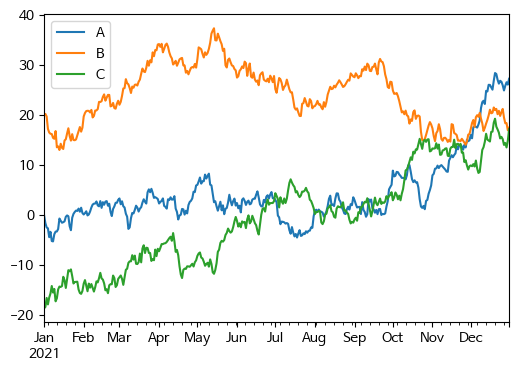

In [5]:
df.plot()

특정 column 을 x 축, y 축으로 지정

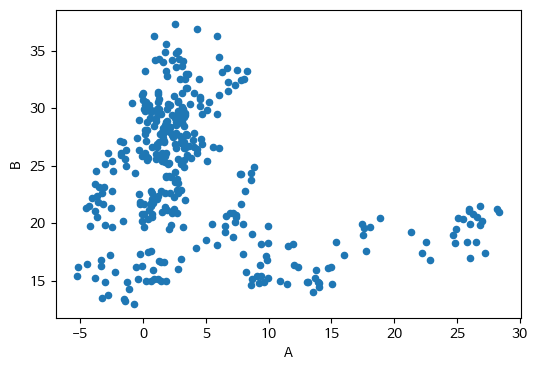

In [6]:
df.plot('A', 'B', kind='scatter');

색을 이용하여 2 차원 평면상에 3 차원 정보를 plot 할 수 있습니다.

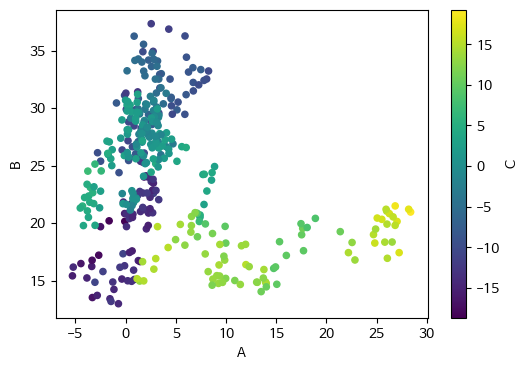

In [7]:
df.plot.scatter('A', 'B', c='C', colormap='viridis');

matplotlib 사용과 비교

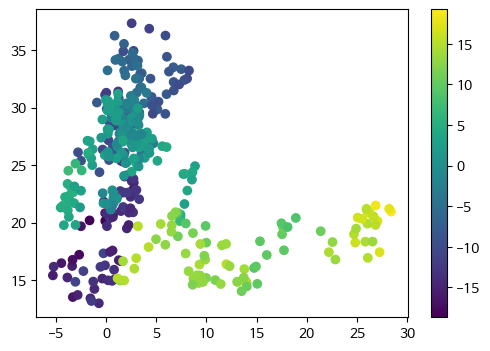

In [8]:
plt.scatter(df.A, df.B, c=df.C, cmap='viridis')
plt.colorbar()

- box plot

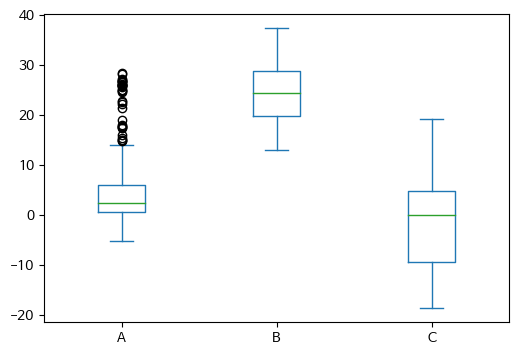

In [9]:
df.plot.box();

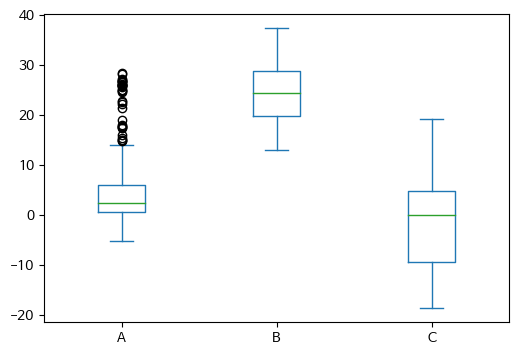

In [10]:
df.plot(kind="box");

- histogram

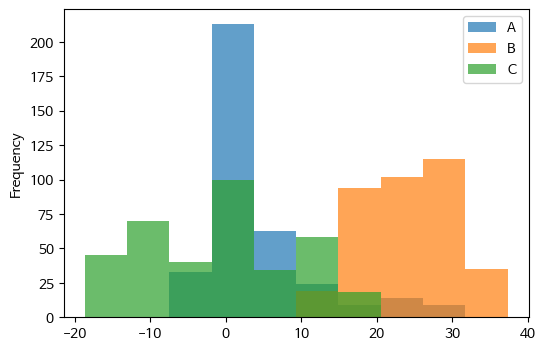

In [11]:
df.plot.hist(alpha=0.7);

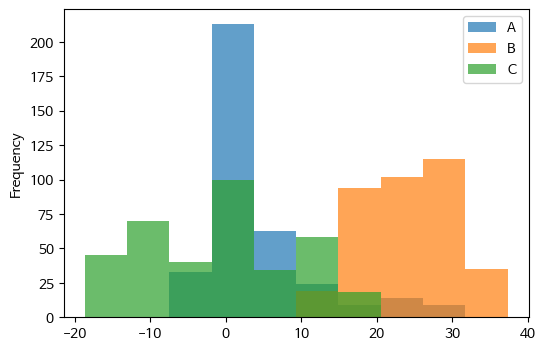

In [12]:
df.plot(kind="hist", alpha=0.7);

## 1980년부터 2013년까지 캐나다로의 이민 분석

https://www.un.org/development/desa/pd/data/international-migration-flows

이 데이터 세트에는 목적지 국가별로 기록된 국제 이민자 흐름에 대한 연간 데이터가 포함되어 있습니다. 이 데이터는 외국인과 내국인의 출생지, 시민권 또는 이전 거주지/다음 거주지에 따라 유입과 유출을 모두 표시합니다. 현재 버전은 45개국의 데이터를 제공합니다.

이 실습에서는 캐나다 이민 데이터에 중점을 둘 것입니다.

In [ ]:
# !pip install openpyxl

캐나다 이민자 데이터를 읽어 들입니다.

In [13]:
df_can = pd.read_excel("Canada.xlsx", engine='openpyxl',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [14]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

불필요한 열(예 : AREA, REG)을 제거합니다.

In [15]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage', 'DevName'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603


이해하기 쉽게 열 이름을 변경합니다.

In [16]:
df_can.rename(columns={'OdName': '국가',
                                          'AreaName': '대륙',
                                         'RegName': '지역'}, inplace=True)
df_can.head(2)

,국가,대륙,지역,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603


In [17]:
df_can.columns

Index(['국가', '대륙', '지역', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013],
      dtype='object')

국가 이름을 index로 설정하면 .loc 메소드를 사용하여 국가를 빠르게 찾는 데 유용합니다.

In [18]:
df_can.set_index('국가', inplace=True)
df_can.head(2)

,대륙,지역,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
국가,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603


total column을 추가합니다.

In [19]:
df_can['Total'] = df_can.iloc[:, 3:].sum(axis=1)
df_can.head()

,대륙,지역,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
국가,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58623
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15698
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69359
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [20]:
df_can.shape

(195, 37)

Haiti 에서의 연도별 이민자 수를 Line Plot으로 시각화합니다.  

Text(30, 10000, '2010 지진발생')

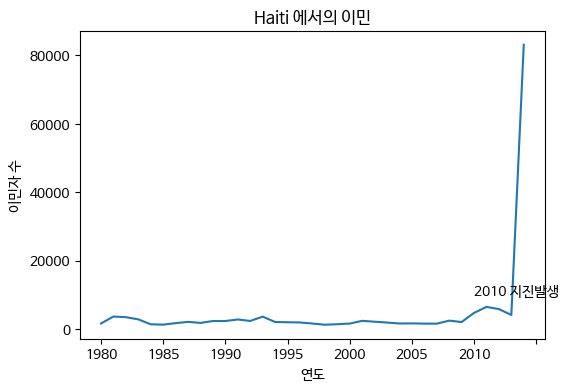

In [30]:
haiti = df_can.loc['Haiti', 1980:]   # 'total' 열을 제외한 1980년 - 2013년의 Haiti data

haiti.plot(kind='line')

ax = plt.gca()
ax.set_xlabel('연도')
ax.set_ylabel('이민자 수')
ax.set_title('Haiti 에서의 이민')
ax.text(30, 10000, '2010 지진발생')  #x: 1980+30,

다른 나라들 간의 이민자 수 비교를 위해 그래프에 더 많은 국가를 추가 합니다.

- 1980 년부터 2013 년까지 인도와 중국 이민자 수를 비교

Step 1: China 와 India 를 dataframe 에서 따로 추출하여 plot 합니다.

In [31]:
df_ci = df_can.loc[['China', 'India'], 1980:2013]
df_ci

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
국가,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


*pandas*는 x 축의 인덱스와 y 축의 개별 라인으로의 열을 그립니다. `df_ci`는`국가`를 인덱스로, `연도`를 컬럼으로하는 데이터 프레임이기 때문에 `연도`를 x축으로 표시하려면 `transpose ()`메소드를 사용하여 데이터 프레임의 행과 열을 변경합니다.

In [32]:
df_ci = df_ci.transpose()
df_ci.head()

국가,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


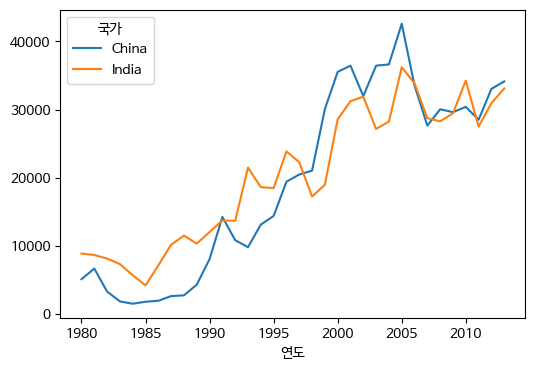

In [33]:
# line plot
df_ci.plot(kind='line')

plt.xlabel('연도')
plt.show()

캐나다 이민에 가장 많은 기여를 한 상위 5 개국의 추세를 비교해 봅니다.

In [34]:
# pd.set_option('display.max_row', None)
top5 = df_can.loc[:, 1980:].sum(axis=1).sort_values(ascending=False)[:5]
top5

국가
India                                                   1374928
China                                                   1314801
United Kingdom of Great Britain and Northern Ireland    1080955
Philippines                                             1016731
Pakistan                                                 482222
dtype: int64

국가명 `United Kingdom of Great Britain and Northern Ireland`이 너무 길므로 짧은 이름으로 변경합니다.

In [35]:
df_can.rename(index={'United Kingdom of Great Britain and Northern Ireland': 'UK'}, inplace=True)

top5 = df_can.loc[:, 1980:2013].sum(axis=1).sort_values(ascending=False)[:5]
top5

국가
India          691904
China          659962
UK             551500
Philippines    511391
Pakistan       241600
dtype: int64

In [36]:
top5_countries = top5.index.tolist()
top5_countries

['India', 'China', 'UK', 'Philippines', 'Pakistan']

In [37]:
df_top5 = df_can.loc[top5_countries, 1980:2013]
df_top5 = df_top5.transpose()
df_top5.head()

국가,India,China,UK,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


top5 국가의 연도별 이민자 증감 추세를 한 차트로 비교해 봅니다.

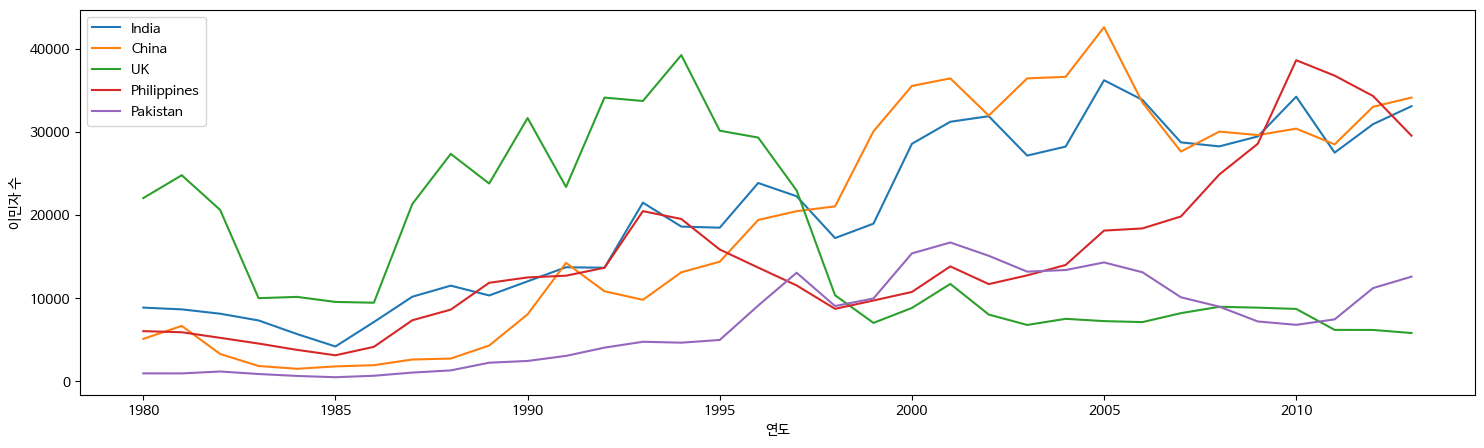

In [38]:
df_top5.plot(kind='line', figsize=(18, 5))
ax = plt.gca()
ax.legend(top5_countries)
ax.set_xlabel('연도');
ax.set_ylabel('이민자 수');

## Bar Chart + 주석 달기

bar chart는 그룹화된 범주형 변수의 크기를 표시합니다. 통계에 의하면 세계 금융위기 기간 중 Iceland로 부터 Canada로의 이민자가 급격히 늘었다고 합니다. 이를 시각화를 통해 확인해 봅니다.

In [39]:
df_iceland = df_can.loc['Iceland', 1980:2013]

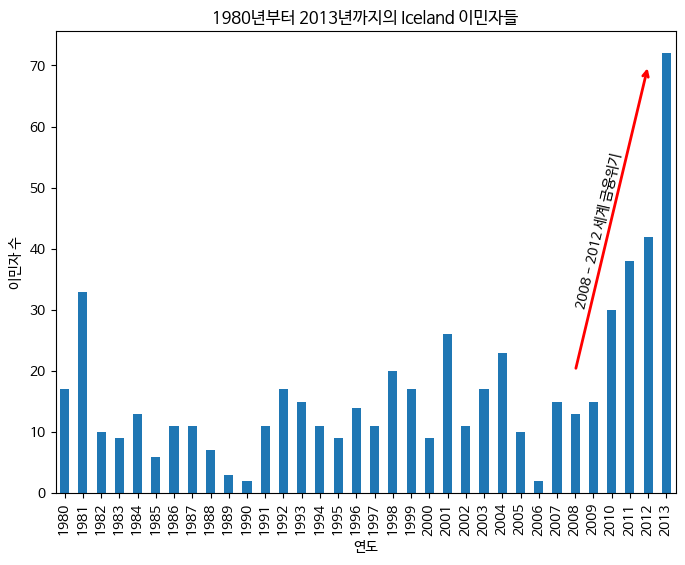

In [40]:
df_iceland.plot(kind='bar', figsize=(8, 6))

plt.title('1980년부터 2013년까지의 Iceland 이민자들')
plt.ylabel('이민자 수')
plt.xlabel('연도')

#화살표 그리기
plt.annotate('',                      # 표시할 text
                   xy=(32, 70),       #  화살표의 머리 위치
                   xytext=(28, 20),   # 화살표의 꼬리 위치
                   arrowprops=dict(arrowstyle='->', color='red', lw=2)
            )
#글씨 쓰기
plt.annotate('2008 - 2012 세계 금융위기',      # 표시할 text
                  xy=(28, 30),                   # text 시작 위치
                  rotation=77,                   # trial and error 로 맞춤
                  va='bottom',                   # text 가 vertically bottom 정렬
                  ha='left'                      # text 가 horizontally 좌측 정렬
            )
plt.show()